In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import matplotlib
import numpy.polynomial.polynomial as poly
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams["font.sans-serif"] = "Arial"

In [12]:
design_mat = scipy.io.loadmat('radius_sweep_e.mat')['energy_min']

In [13]:
r_num = design_mat.shape[0]
d_num = design_mat.shape[1]
design_mat.shape

(10, 9)

In [14]:
displacement = .4/(d_num-1)
disp_grid = displacement*np.arange(d_num)

r_grid = .03*(1+np.arange(r_num))

In [15]:
def extract_stiffness_list(design_mat):
    
    stiffness = []

    for ri in np.arange(r_num):

        energy = design_mat[ri]

        r = r_grid[ri]
        l = 1
        c = 50
        m = -(2*np.pi*1/np.tan(c/180*np.pi)+1)*r**2

        switches = np.sign(np.diff(energy))
        if np.sum(np.abs(np.diff(switches))/2) > 0:
            quality = 0
        else:
            quality = 1

        k = poly.polyfit(disp_grid,energy-energy[0],[2])[-1]

        stiffness.append([r,l,m,c,quality,k])
                    
    return np.array(stiffness)

def extract_stiffness_mat(design_mat):
    
    stiffness = np.zeros((r_num,2))

    for ri in np.arange(r_num):
                    
        energy = design_mat[ri]

        switches = np.sign(np.diff(energy))
        if np.sum(np.abs(np.diff(switches))/2) > 0:
            quality = 0
        else:
            quality = 1

        k = poly.polyfit(disp_grid,energy-energy[0],[2])[-1]
        
        stiffness[ri,0] = k
        stiffness[ri,1] = quality
                    
                    
    return np.array(stiffness)

In [16]:
stiffness_list = extract_stiffness_list(design_mat)

stiffness_mat = extract_stiffness_mat(design_mat)
stiffness_mat.shape

(10, 2)

In [17]:
theory_grid = .03*(1+np.arange(r_num))
R = theory_grid
c = 1/np.tan(50/180*np.pi)
f = -(2*np.pi*c+1)*R**2/2/np.pi
k_theory = -np.pi*(2*f+c)*(f*(1+R**2)+R**2*c)/(1-R**2)

In [18]:
B0 = -f
A = 2*(c - B0);
A1 = (2*B0 - c)/(1-R*R);
B1 = R*R*A1;
k_theory_check = np.pi/2*(A*(A/4 + B0/2 + A1 + B1) - c*(A/2 + 2*A1))

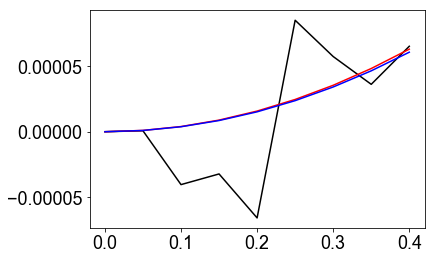

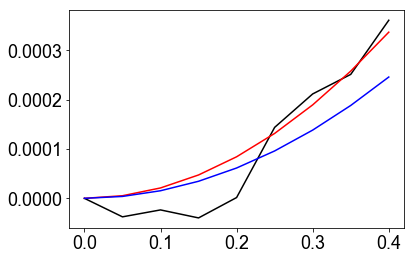

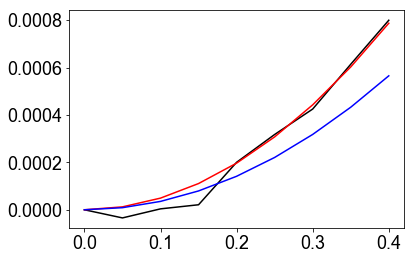

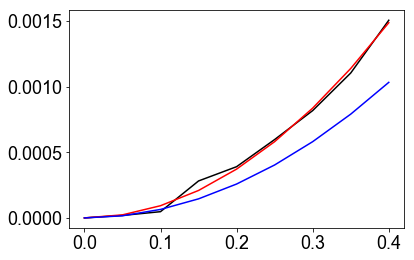

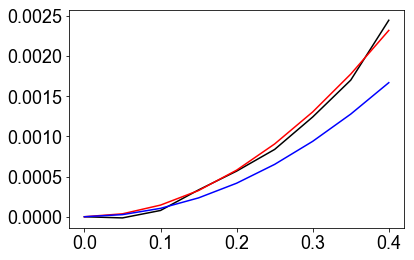

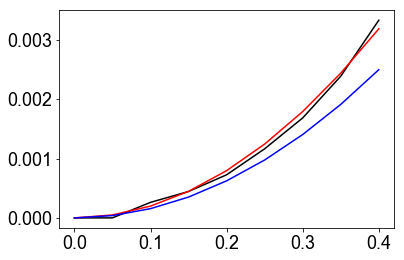

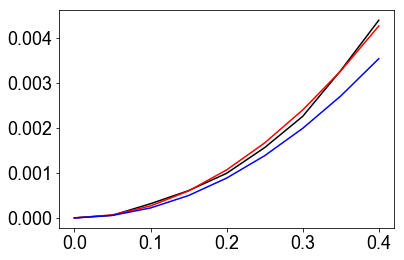

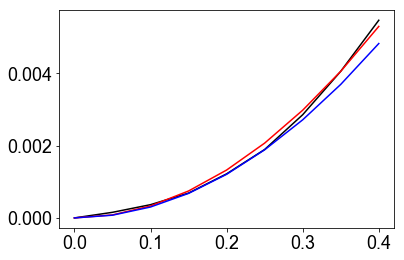

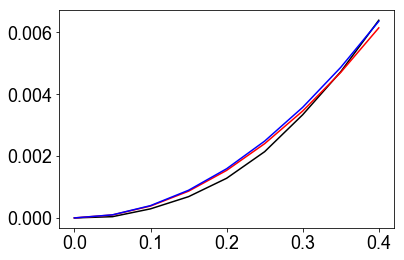

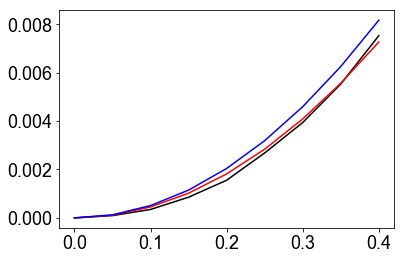

In [19]:
for i in np.arange(r_num):
    plt.figure()
    plt.plot(disp_grid,design_mat[i]-design_mat[i][0],color='black')
    plt.plot(disp_grid,stiffness_list[i,-1]*disp_grid**2,color='red')
    plt.plot(disp_grid,k_theory[(i+1)-1]*disp_grid**2,color='blue')
    plt.show()

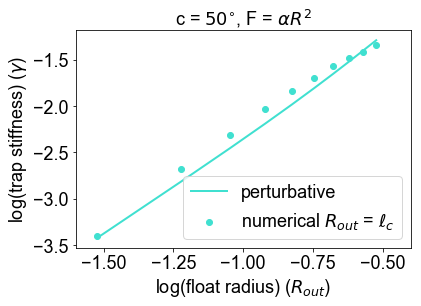

In [20]:
fig, ax = plt.subplots()
plt.scatter(np.log10(stiffness_list[:,0]),np.log10(stiffness_list[:,-1]),label=r'numerical $R_{out}$ = $\ell_c$',color='turquoise')
plt.plot(np.log10(theory_grid),np.log10(k_theory),label='perturbative',color='turquoise',linewidth=2)
plt.title(r'c = $50^{\circ}$, F = $\alpha R^2$',fontsize=18)
plt.xlabel(r'log(float radius) ($R_{out}$)')
plt.ylabel(r'log(trap stiffness) ($\gamma$)')
plt.xlim([-1.6,-.4])
plt.legend()
plt.savefig('radius_sweep_stiffness.pdf',format = 'pdf',bbox_inches="tight")
plt.show()